In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math


In [140]:
# load data
data_url = 'https://raw.githubusercontent.com/rdharjai/info5502/main/hw4/multipleChoiceResponses.csv'
data = pd.read_csv(data_url)

# remove the 'questions' row
data_questions = data.iloc[0]
data = data.drop(0, axis=0)

# remove rows for which Yearly Income is 'nan' or 'I do not wish to disclose...'
data = data[data['Q9'].notnull()]
data = data[data['Q9'] != 'I do not wish to disclose my approximate yearly compensation']

# add a new column: "Q9_avg".
# it holds the average of Yearly Income range (in Q9)
data['Q9_avg'] = 0
data.loc[data.Q9=='0-10,000','Q9_avg'] = 5000
data.loc[data.Q9=='10-20,000','Q9_avg'] = 15000
data.loc[data.Q9=='20-30,000','Q9_avg'] = 25000
data.loc[data.Q9=='30-40,000','Q9_avg'] = 35000
data.loc[data.Q9=='40-50,000','Q9_avg'] = 45000
data.loc[data.Q9=='50-60,000','Q9_avg'] = 55000
data.loc[data.Q9=='60-70,000','Q9_avg'] = 65000
data.loc[data.Q9=='70-80,000','Q9_avg'] = 75000
data.loc[data.Q9=='80-90,000','Q9_avg'] = 85000
data.loc[data.Q9=='90-100,000','Q9_avg'] = 95000
data.loc[data.Q9=='100-125,000','Q9_avg'] = 112500
data.loc[data.Q9=='125-150,000','Q9_avg'] = 137500
data.loc[data.Q9=='150-200,000','Q9_avg'] = 175000
data.loc[data.Q9=='200-250,000','Q9_avg'] = 225000
data.loc[data.Q9=='250-300,000','Q9_avg'] = 275000
data.loc[data.Q9=='300-400,000','Q9_avg'] = 350000
data.loc[data.Q9=='400-500,000','Q9_avg'] = 450000
data.loc[data.Q9=='500,000+','Q9_avg'] = 500000
data[["Q1", "Q9", "Q9_avg"]].head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Q1,Q9,Q9_avg
2,Male,"10-20,000",15000
3,Female,"0-10,000",5000
5,Male,"0-10,000",5000
7,Male,"10-20,000",15000
8,Male,"0-10,000",5000


In [141]:
def get_sample(arry:np.ndarray, size:int, with_replacement:bool)->pd.core.frame.DataFrame:
  if size <= 0:
    size = 1
  return np.random.choice(arry, size=size, replace=with_replacement)

def get_stat(arry:np.ndarray)->int:
  return np.median(arry)

def get_test_stat(stat1:int, stat2:int)->int:
  return stat1-stat2



In [262]:
income = np.array(data.Q9_avg)
income_male = np.array(data.loc[data.Q1=='Male','Q9_avg'])
income_female = np.array(data.loc[data.Q1=='Female','Q9_avg'])

sample_male = get_sample(income_male, 250, with_replacement=False)
sample_female = get_sample(income_female, 250, with_replacement=False)
sample = np.concatenate((sample_male, sample_female), axis=0)

pop_income_median = get_stat(income)
pop_income_median_male = get_stat(income_male)
pop_income_median_female = get_stat(income_female)

smpl_income_median = get_stat(sample)
smpl_income_median_male = get_stat(sample_male)
smpl_income_median_female = get_stat(sample_female)

print("Population Size: ", income.size)
print("Population: Median Income: ", pop_income_median)
print("Population: Median Income (Male): ", pop_income_median_male)
print("Population: Median Income (Female): ", pop_income_median_female)

print("\nSample Size: ", sample.size)
print("Sample: Median Income: ", smpl_income_median)
print("Sample: Median Income (Male): ", smpl_income_median_male)
print("Sample: Median Income (Female): ", smpl_income_median_female)


Population Size:  15429
Population: Median Income:  25000.0
Population: Median Income (Male):  35000.0
Population: Median Income (Female):  25000.0

Sample Size:  500
Sample: Median Income:  25000.0
Sample: Median Income (Male):  35000.0
Sample: Median Income (Female):  25000.0


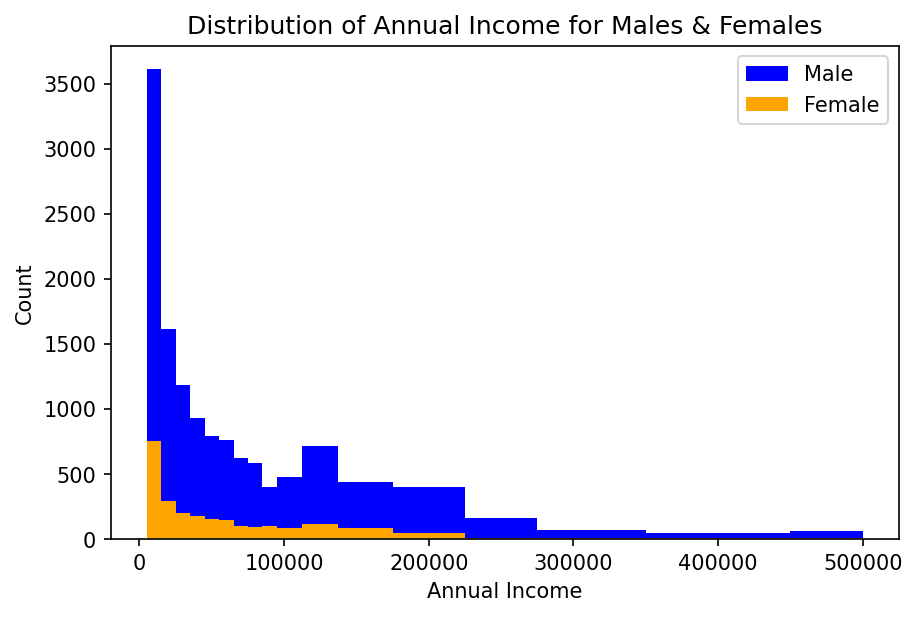

In [263]:
figure, ax = plt.subplots(constrained_layout=True)
figure.set_dpi(150)

ax.hist(income_male, 
        label='Male', 
        color='blue', 
        bins=np.unique(income_male))

ax.hist(income_female, 
        label='Female', 
        color='orange',
        bins=np.unique(income_female))

plt.xlabel("Annual Income", size=10)
plt.ylabel("Count", size=10)
plt.title("Distribution of Annual Income for Males & Females", size=12)
plt.legend(loc='upper right')

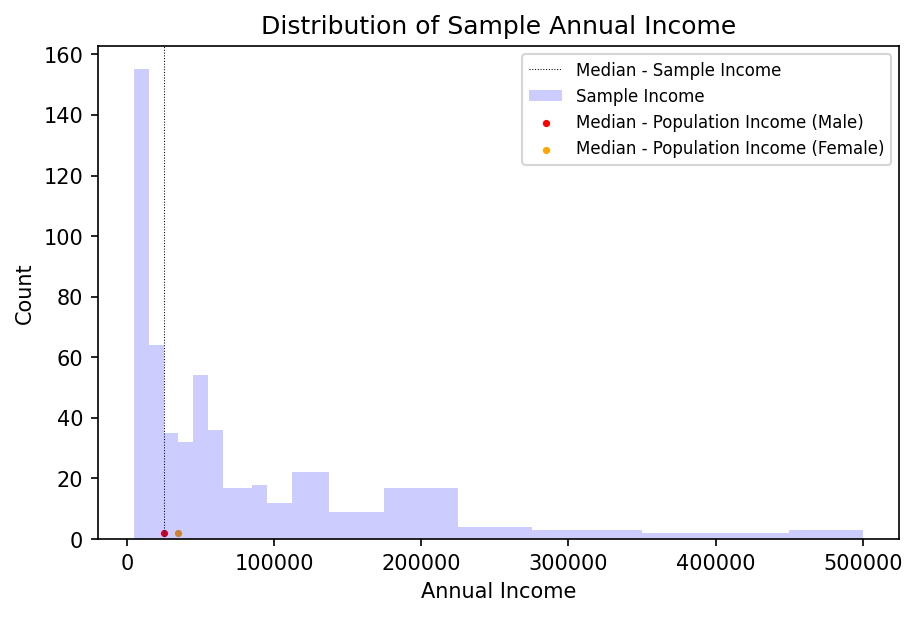

In [264]:
figure, ax = plt.subplots(constrained_layout=True)
figure.set_dpi(150)

ax.hist(sample, 
        label='Sample Income', 
        color='blue', 
        alpha=0.2,
        bins=np.unique(sample))

ax.scatter(x=pop_income_median_female, y=2, c='red', s=6, label="Median - Population Income (Male)")
ax.scatter(x=pop_income_median_male, y=2, c='orange', s=6, label="Median - Population Income (Female)")

plt.axvline(x=pop_income_median, ymin=0, ymax=120, color='black', linestyle='dotted', linewidth=0.5, label="Median - Sample Income")
plt.xlabel("Annual Income", size=10)
plt.ylabel("Count", size=10)
plt.title("Distribution of Sample Annual Income", size=12)
plt.legend(loc='upper right', prop={'size': 8})

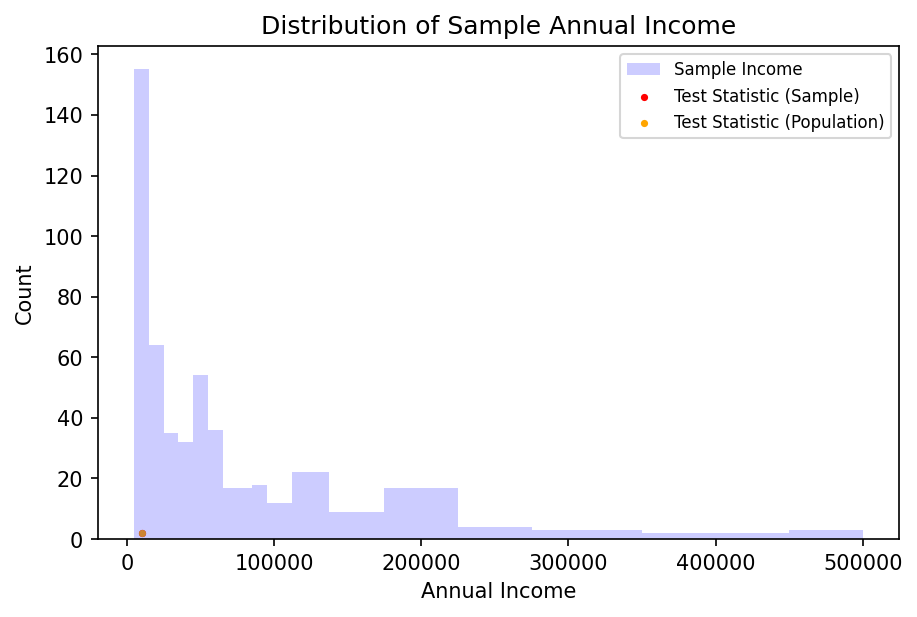

In [265]:
figure, ax = plt.subplots(constrained_layout=True)
figure.set_dpi(150)

ax.hist(sample, 
        label='Sample Income', 
        color='blue', 
        alpha=0.2,
        bins=np.unique(sample))

ax.scatter(x=get_test_stat(pop_income_median_male, pop_income_median_female), y=2, c='red', s=6, label="Test Statistic (Sample)")
ax.scatter(x=get_test_stat(smpl_income_median_male, smpl_income_median_female), y=2, c='orange', s=6, label="Test Statistic (Population)")

plt.xlabel("Annual Income", size=10)
plt.ylabel("Count", size=10)
plt.title("Distribution of Sample Annual Income", size=12)
plt.legend(loc='upper right', prop={'size': 8})



In [266]:
test_stats = []

repetitions = 5000
for i in range(repetitions):
  male_smpl = get_sample(sample_male, size=250, with_replacement=True)
  female_smpl = get_sample(sample_female, size=250, with_replacement=True)
  test_stats.append(get_test_stat(get_stat(male_smpl), get_stat(female_smpl)))


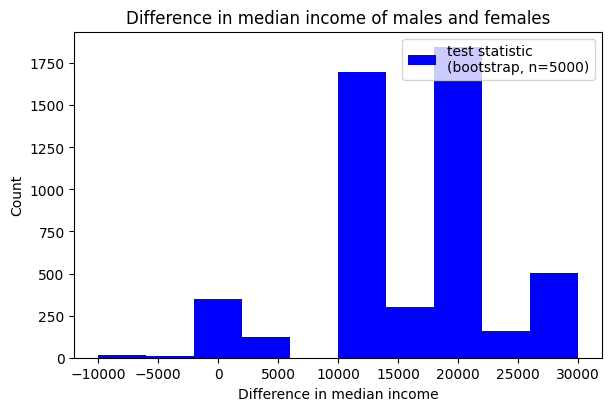

In [267]:
figure, ax = plt.subplots(constrained_layout=True)
figure.set_dpi(100)

ax.hist(test_stats, 
        label='test statistic\n(bootstrap, n=5000)', 
        color='blue')

# ax.xaxis.set_ticks(np.arange(np.array(test_stats).min(),np.array(test_stats).max(),5000))

plt.xlabel("Difference in median income", size=10)
plt.ylabel("Count", size=10)
plt.title("Difference in median income of males and females", size=12)
plt.legend(loc='upper right')


In [268]:
test_stat_arry = np.array(test_stats)
ci_low = np.percentile(test_stat_arry, 2.5, axis=0)
ci_high = np.percentile(test_stat_arry, 97.5, axis=0)
print("CI 95%: [{}, {}]".format(round(ci_low,2), round(ci_high,2)))


CI 95%: [0.0, 30000.0]


In [269]:
pvalue = np.mean(test_stat_arry > get_test_stat(smpl_income_median_male, smpl_income_median_female))
print("pvalue: ", pvalue)

pvalue:  0.561
